In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn 

# Read + Normalize Data

In [ ]:
X_df = pd.read_csv('spaceship_train_X.csv')
X_df.drop('Unnamed: 0', axis=1, inplace=True)
y_df = pd.read_csv('spaceship_train_y.csv')
y_df.drop('Unnamed: 0', axis=1, inplace=True)
X_test = pd.read_csv('spaceship_test_X.csv')
X_test.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
X_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,CabinSide,CabinRegion_1,CabinRegion_2,CabinRegion_3,CabinRegion_4,CabinRegion_5,CabinRegion_6,CabinRegion_7,CabinRegion,FamilySize
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,P,1,0,0,0,0,0,0,1.0,4
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,S,1,0,0,0,0,0,0,1.0,4
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,S,1,0,0,0,0,0,0,1.0,7
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,S,1,0,0,0,0,0,0,1.0,7
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,S,1,0,0,0,0,0,0,1.0,9


In [ ]:
y_df.head()

,Transported
0,0
1,1
2,0
3,0
4,1


In [ ]:
X_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,CabinSide,CabinRegion_1,CabinRegion_2,CabinRegion_3,CabinRegion_4,CabinRegion_5,CabinRegion_6,CabinRegion_7,CabinRegion,FamilySize
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,...,S,1,0,0,0,0,0,0,1.0,8
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,...,S,1,0,0,0,0,0,0,1.0,4
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,...,S,1,0,0,0,0,0,0,1.0,6
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,...,S,1,0,0,0,0,0,0,1.0,2
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,...,S,1,0,0,0,0,0,0,1.0,5


## Descriptive Statistic

In [ ]:
print(X_df.info(verbose=True))
print(X_df.describe())
print(X_df.select_dtypes(include=['object']).describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    8693 non-null   object 
 1   HomePlanet     8693 non-null   object 
 2   CryoSleep      8693 non-null   bool   
 3   Cabin          8693 non-null   object 
 4   Destination    8693 non-null   object 
 5   Age            8693 non-null   float64
 6   VIP            8693 non-null   bool   
 7   RoomService    8693 non-null   float64
 8   FoodCourt      8693 non-null   float64
 9   ShoppingMall   8693 non-null   float64
 10  Spa            8693 non-null   float64
 11  VRDeck         8693 non-null   float64
 12  AgeGroup       8693 non-null   object 
 13  Expenditure    8693 non-null   float64
 14  NoSpending     8693 non-null   int64  
 15  Group          8693 non-null   int64  
 16  GroupSize      8693 non-null   int64  
 17  Solo           8693 non-null   int64  
 18  CabinDec

# To-Dos Part 1

- [x] Check for data types error

- [x] Check for data skew and imbalance, do transformation and imbalance handling if needed

- [x] Drop unnecessary and complex features (PassengerID, Cabin, Age, CabinNum, CabinRegion,) 

- [ ] One-hot encoding (indicator variables) for HomePlanet, Destination, CabinSide and CabinDeck

- [x] Normalize continuous variables using Z-Score

- [x] For each continuous variables: find correlation with target variable

- [x] For each variables: plot with target variable

- [x] Label encoding for AgeGroup

In [ ]:
X_df.dtypes

PassengerId       object
HomePlanet        object
CryoSleep           bool
Cabin             object
Destination       object
Age              float64
VIP                 bool
RoomService      float64
FoodCourt        float64
ShoppingMall     float64
Spa              float64
VRDeck           float64
AgeGroup          object
Expenditure      float64
NoSpending         int64
Group              int64
GroupSize          int64
Solo               int64
CabinDeck         object
CabinNum         float64
CabinSide         object
CabinRegion_1      int64
CabinRegion_2      int64
CabinRegion_3      int64
CabinRegion_4      int64
CabinRegion_5      int64
CabinRegion_6      int64
CabinRegion_7      int64
CabinRegion      float64
FamilySize         int64
dtype: object

In [ ]:
X_test.dtypes

PassengerId       object
HomePlanet        object
CryoSleep           bool
Cabin             object
Destination       object
Age              float64
VIP                 bool
RoomService      float64
FoodCourt        float64
ShoppingMall     float64
Spa              float64
VRDeck           float64
AgeGroup          object
Expenditure      float64
NoSpending         int64
Group              int64
GroupSize          int64
Solo               int64
CabinDeck         object
CabinNum         float64
CabinSide         object
CabinRegion_1      int64
CabinRegion_2      int64
CabinRegion_3      int64
CabinRegion_4      int64
CabinRegion_5      int64
CabinRegion_6      int64
CabinRegion_7      int64
CabinRegion      float64
FamilySize         int64
dtype: object

<AxesSubplot: xlabel='Transported', ylabel='count'>

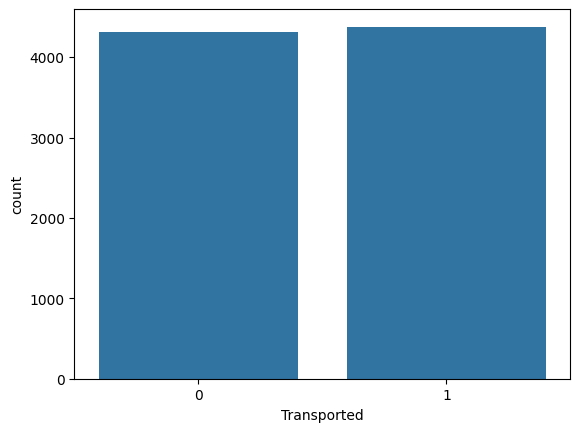

In [ ]:
sns.countplot(data=y_df, x='Transported')

In [ ]:
X_df.drop(columns=['Cabin', 'Age', 'CabinNum', 'CabinRegion'], inplace=True)
X_test.drop(columns=['Cabin', 'Age', 'CabinNum', 'CabinRegion'], inplace=True)
print(X_df.columns)
print(X_df.columns)

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'AgeGroup',
       'Expenditure', 'NoSpending', 'Group', 'GroupSize', 'Solo', 'CabinDeck',
       'CabinSide', 'CabinRegion_1', 'CabinRegion_2', 'CabinRegion_3',
       'CabinRegion_4', 'CabinRegion_5', 'CabinRegion_6', 'CabinRegion_7',
       'FamilySize'],
      dtype='object')
Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'AgeGroup',
       'Expenditure', 'NoSpending', 'Group', 'GroupSize', 'Solo', 'CabinDeck',
       'CabinSide', 'CabinRegion_1', 'CabinRegion_2', 'CabinRegion_3',
       'CabinRegion_4', 'CabinRegion_5', 'CabinRegion_6', 'CabinRegion_7',
       'FamilySize'],
      dtype='object')


In [ ]:
# dummy_hdsd = indicator variables for HomePlanet, Destination, CabinSide and CabinDeck
dummy_hdsd = pd.get_dummies(X_df[['HomePlanet', 'Destination', 'CabinSide', 'CabinDeck']]).astype(int)
dummy_hdsd_test = pd.get_dummies(X_test[['HomePlanet', 'Destination', 'CabinSide', 'CabinDeck']]).astype(int)
dummy_hdsd.head()

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CabinSide_P,CabinSide_S,CabinSide_Z,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T
0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
X_df = pd.concat([X_df, dummy_hdsd], axis=1)
X_df = X_df.drop(columns=['HomePlanet', 'Destination', 'CabinSide', 'CabinDeck'])
X_df.head()

,PassengerId,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,AgeGroup,Expenditure,...,CabinSide_S,CabinSide_Z,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T
0,0001_01,False,False,0.0,0.0,0.0,0.0,0.0,Age_36-50,0.0,...,0,0,0,1,0,0,0,0,0,0
1,0002_01,False,False,109.0,9.0,25.0,549.0,44.0,Age_19-35,736.0,...,1,0,0,0,0,0,0,1,0,0
2,0003_01,False,True,43.0,3576.0,0.0,6715.0,49.0,Age_51+,10383.0,...,1,0,1,0,0,0,0,0,0,0
3,0003_02,False,False,0.0,1283.0,371.0,3329.0,193.0,Age_19-35,5176.0,...,1,0,1,0,0,0,0,0,0,0
4,0004_01,False,False,303.0,70.0,151.0,565.0,2.0,Age_0-18,1091.0,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
X_test = pd.concat([X_test, dummy_hdsd_test], axis=1)
X_test = X_test.drop(columns=['HomePlanet', 'Destination', 'CabinSide', 'CabinDeck'])
X_test.head()

,PassengerId,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,AgeGroup,Expenditure,...,CabinSide_S,CabinSide_Z,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T
0,0013_01,True,False,0.0,0.0,0.0,0.0,0.0,Age_19-35,0.0,...,1,0,0,0,0,0,0,0,1,0
1,0018_01,False,False,0.0,9.0,0.0,2823.0,0.0,Age_19-35,2832.0,...,1,0,0,0,0,0,0,1,0,0
2,0019_01,True,False,0.0,0.0,0.0,0.0,0.0,Age_19-35,0.0,...,1,0,0,0,1,0,0,0,0,0
3,0021_01,False,False,0.0,6652.0,0.0,181.0,585.0,Age_36-50,7418.0,...,1,0,0,0,1,0,0,0,0,0
4,0023_01,False,False,10.0,0.0,635.0,0.0,0.0,Age_19-35,645.0,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
bool_cols = X_df.select_dtypes(include=['bool']).columns
X_df[bool_cols] = X_df[bool_cols].astype('int')
X_df[bool_cols].head()

,CryoSleep,VIP
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0


In [ ]:
X_test[bool_cols] = X_test[bool_cols].astype('int')
X_test[bool_cols].head()

,CryoSleep,VIP
0,1,0
1,0,0
2,1,0
3,0,0
4,0,0


In [ ]:
# Z-Score normalization for continuous variables
continuous_cols = X_df.select_dtypes(include=['float64']).columns
X_df[continuous_cols] = (X_df[continuous_cols]-X_df[continuous_cols].mean())/X_df[continuous_cols].std()
X_df[continuous_cols].describe()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Expenditure
count,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03
mean,-8.888936e-17,2.043434e-18,2.288646e-17,5.599008e-17,2.676898e-17,1.839090e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.375299e-01,-2.838651e-01,-2.873829e-01,-2.738263e-01,-2.658309e-01,-5.183569e-01
25%,-3.375299e-01,-2.838651e-01,-2.873829e-01,-2.738263e-01,-2.658309e-01,-5.183569e-01
50%,-3.375299e-01,-2.838651e-01,-2.873829e-01,-2.738263e-01,-2.658309e-01,-2.608497e-01
75%,-2.466628e-01,-2.299827e-01,-2.338521e-01,-2.089651e-01,-2.182158e-01,-3.342425e-03
max,2.136001e+01,1.839518e+01,3.901092e+01,1.963588e+01,2.101372e+01,1.228125e+01


In [ ]:
X_test[continuous_cols] = (X_test[continuous_cols]-X_test[continuous_cols].mean())/X_test[continuous_cols].std()
X_test[continuous_cols].describe()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Expenditure
count,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03
mean,3.322622e-18,-2.325835e-17,2.658098e-17,-4.153278e-17,-1.661311e-17,3.654884e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.618004e-01,-2.870880e-01,-3.165979e-01,-2.709731e-01,-2.490971e-01,-5.071444e-01
25%,-3.618004e-01,-2.870880e-01,-3.165979e-01,-2.709731e-01,-2.490971e-01,-5.071444e-01
50%,-3.618004e-01,-2.870880e-01,-3.165979e-01,-2.709731e-01,-2.490971e-01,-2.525493e-01
75%,-2.554190e-01,-2.288284e-01,-2.408789e-01,-2.166683e-01,-2.159282e-01,5.228254e-03
max,1.886498e+01,1.644467e+01,1.463250e+01,1.768944e+01,1.776889e+01,1.139730e+01


In [ ]:
# Check for variable with high correlation to 'Transported'
continuous_corrs = pd.concat([X_df, y_df], axis=1).select_dtypes(include=['float64', 'int64']).corr()
cont_corrs_transported = continuous_corrs['Transported'].abs().sort_values(ascending=False)
cont_corrs_transported

Transported                  1.000000
NoSpending                   0.478877
CryoSleep                    0.467230
RoomService                  0.242952
Spa                          0.219824
VRDeck                       0.205921
Expenditure                  0.200764
HomePlanet_Europa            0.180935
HomePlanet_Earth             0.174128
CabinDeck_B                  0.145278
Solo                         0.113792
CabinDeck_C                  0.110299
Destination_55 Cancri e      0.108722
CabinSide_S                  0.103377
CabinSide_P                  0.100330
CabinDeck_E                  0.096405
Destination_TRAPPIST-1e      0.096319
CabinDeck_F                  0.089928
CabinRegion_2                0.085108
GroupSize                    0.082644
CabinRegion_4                0.072177
CabinRegion_1                0.062109
CabinRegion_5                0.059468
FamilySize                   0.050855
FoodCourt                    0.045311
CabinRegion_6                0.044075
VIP         

In [ ]:
print(X_df.columns)
print(X_test.columns)

Index(['PassengerId', 'CryoSleep', 'VIP', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'AgeGroup', 'Expenditure',
       'NoSpending', 'Group', 'GroupSize', 'Solo', 'CabinRegion_1',
       'CabinRegion_2', 'CabinRegion_3', 'CabinRegion_4', 'CabinRegion_5',
       'CabinRegion_6', 'CabinRegion_7', 'FamilySize', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'CabinSide_P',
       'CabinSide_S', 'CabinSide_Z', 'CabinDeck_A', 'CabinDeck_B',
       'CabinDeck_C', 'CabinDeck_D', 'CabinDeck_E', 'CabinDeck_F',
       'CabinDeck_G', 'CabinDeck_T'],
      dtype='object')
Index(['PassengerId', 'CryoSleep', 'VIP', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'AgeGroup', 'Expenditure',
       'NoSpending', 'Group', 'GroupSize', 'Solo', 'CabinRegion_1',
       'CabinRegion_2', 'CabinRegion_3', 'CabinRegion_4', 'CabinRegion_5',
       'CabinRegion

ValueError: num must be 1 <= num <= 32, not 33

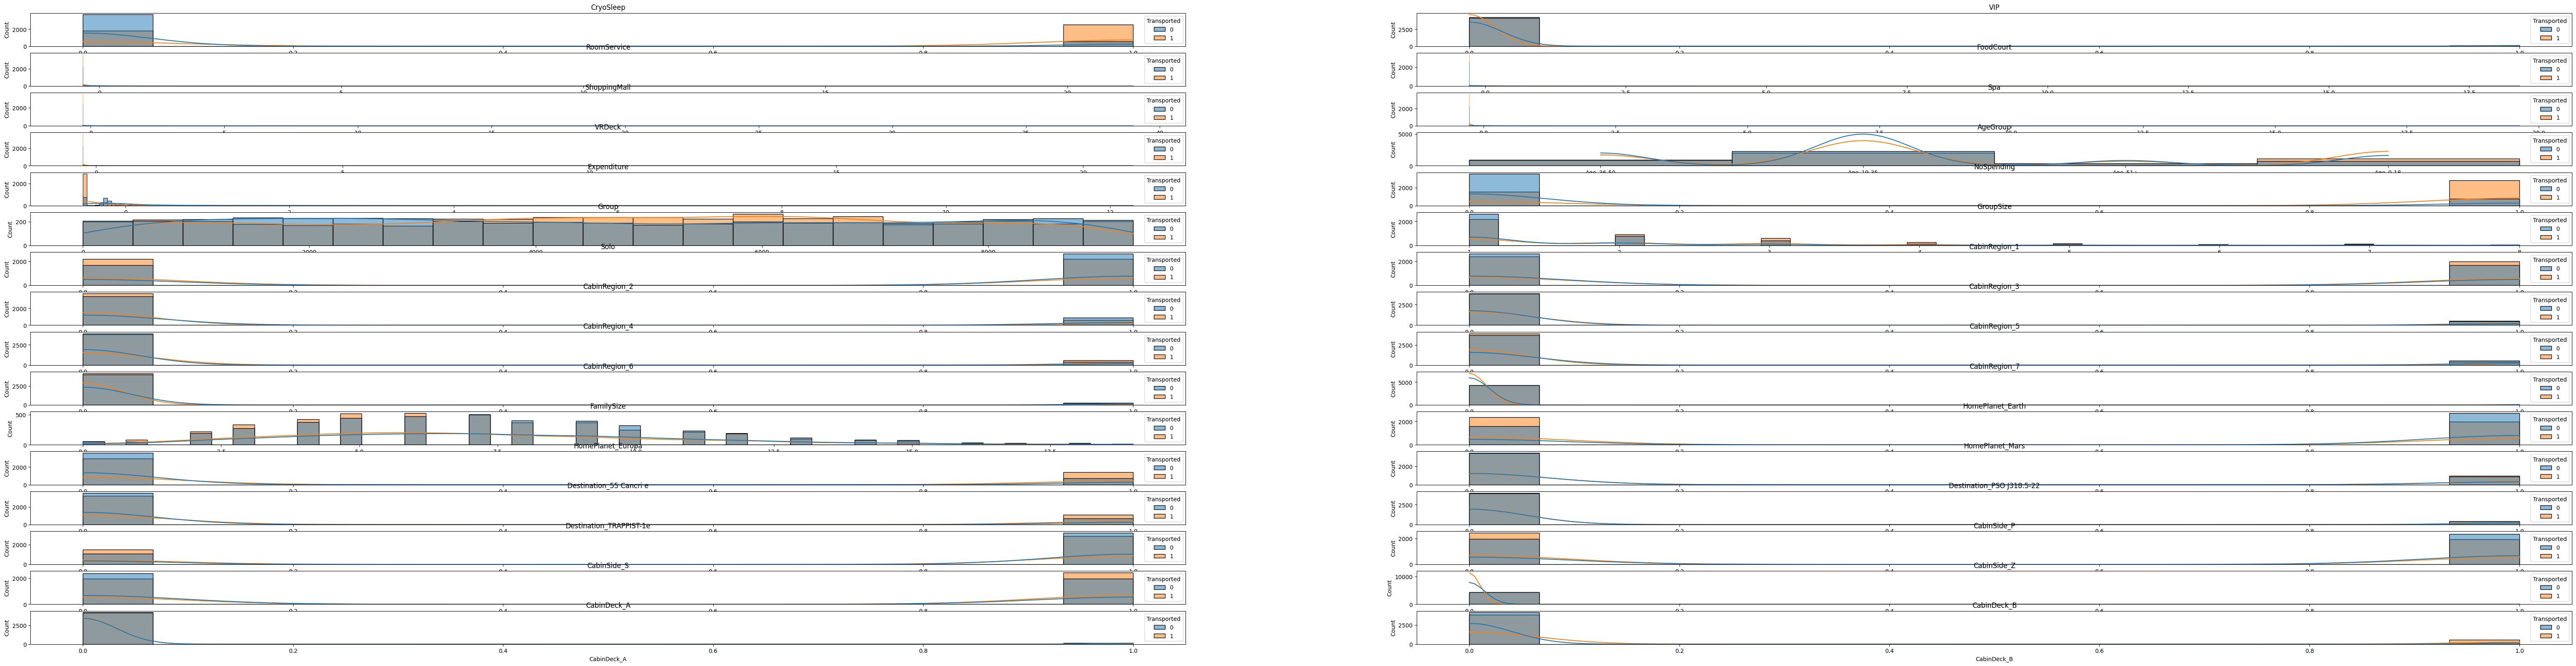

In [ ]:
fig = plt.figure(figsize=(80, 20))
n_row = 16
temp_df = pd.concat([X_df, y_df], axis=1)
for i, col in enumerate(temp_df.columns[1:-1]):
    ax = fig.add_subplot(n_row, 2, i+1)
    sns.histplot(data=temp_df, x=col, hue='Transported', ax=ax, kde=True)
    ax.set_title(col)

plt.tight_layout()
plt.title("Feature distribution for Spaceship Clean Data")
plt.show()

In [ ]:
X_df['AgeGroup'].value_counts()

AgeGroup
Age_19-35    4282
Age_0-18     1891
Age_36-50    1783
Age_51+       737
Name: count, dtype: int64

<AxesSubplot: xlabel='AgeGroup', ylabel='count'>

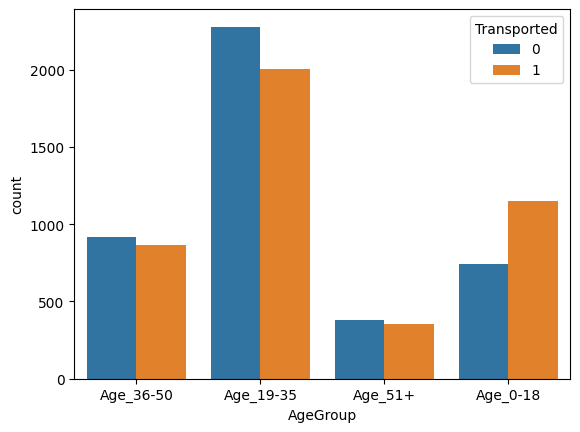

In [ ]:
sns.countplot(data=pd.concat([X_df, y_df], axis=1), x='AgeGroup', hue='Transported')

In [ ]:
# Label Encoding for 'AgeGroup'

X_df['AgeEncoded'] = np.nan
X_df.loc[X_df['AgeGroup']=='Age_0-18', 'AgeEncoded'] = 1
X_df.loc[X_df['AgeGroup']=='Age_19-35', 'AgeEncoded'] = 2
X_df.loc[X_df['AgeGroup']=='Age_36-50', 'AgeEncoded'] = 3
X_df.loc[X_df['AgeGroup']=='Age_51+', 'AgeEncoded'] = 4

X_test['AgeEncoded'] = np.nan
X_test.loc[X_test['AgeGroup']=='Age_0-18', 'AgeEncoded'] = 1
X_test.loc[X_test['AgeGroup']=='Age_19-35', 'AgeEncoded'] = 2
X_test.loc[X_test['AgeGroup']=='Age_36-50', 'AgeEncoded'] = 3
X_test.loc[X_test['AgeGroup']=='Age_51+', 'AgeEncoded'] = 4

In [ ]:
print(X_test['AgeGroup'].value_counts())
print(X_test['AgeEncoded'].value_counts())

AgeGroup
Age_19-35    2196
Age_0-18      907
Age_36-50     838
Age_51+       336
Name: count, dtype: int64
AgeEncoded
2.0    2196
1.0     907
3.0     838
4.0     336
Name: count, dtype: int64


In [ ]:
X_df.drop(columns=['AgeGroup'], inplace=True)
X_test.drop(columns=['AgeGroup'], inplace=True)

In [ ]:
print(X_df.dtypes)
print(X_test.dtypes)

PassengerId                   object
CryoSleep                      int64
VIP                            int64
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
Expenditure                  float64
NoSpending                     int64
Group                          int64
GroupSize                      int64
Solo                           int64
CabinRegion_1                  int64
CabinRegion_2                  int64
CabinRegion_3                  int64
CabinRegion_4                  int64
CabinRegion_5                  int64
CabinRegion_6                  int64
CabinRegion_7                  int64
FamilySize                     int64
HomePlanet_Earth               int64
HomePlanet_Europa              int64
HomePlanet_Mars                int64
Destination_55 Cancri e        int64
Destination_PSO J318.5-22      int64
Destination_TRAPPIST-1e        int64
C

# Export CSV

In [ ]:
X_df.to_csv('spaceship_train_X_v2.csv', index=False)
X_test.to_csv('spaceship_test_X_v2.csv', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a79941c-6614-47fe-9427-0e9f23998893' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>